This notebook describes a quick way to plot spacecraft trajectories in a flexible way with respect to timestamps and coordinate frames and uses the astrospice ([github](https://github.com/astrospice/astrospice), [readthedocs](https://astrospice.readthedocs.io/en/latest/)) python library and follows the astrospice [guided walkthrough](https://astrospice.readthedocs.io/en/latest/guide.html). Astrospice is currently actively supported.

Sam Badman (May 23, 2022)

In [3]:
# install astrospice if needed (uncomment if needed)
# !pip install astrospice

In [20]:
# import astrospice, matplotlib for plotting, 
# datetime for time handling
import astrospice
import matplotlib.pyplot as plt
import datetime

In [12]:
# example : load Parker Solar Probe 
# Note this cell takes a while first time to do the download

# First argument is name of spacecraft. 
# Use print(astrospice.registry) to see the possible entries
# Second is "recon" (reconstructed ephemeris) 
# or "predict" (predicted ephemeris, if you need the predicted trajectory)

kernels = astrospice.registry.get_kernels('psp','recon') 

Files Downloaded:   0%|          | 0/19 [00:00<?, ?file/s]

In [21]:
# Generate list of timestamps (1 per day from 
# 2018,10,1 -> 2018,11,30)
timestamps = [datetime.datetime(2018,10,1)+datetime.timedelta(days=d)
              for d in range(60)
             ] 

In [22]:
# Generate coordinates (output is astropy.coordinates.SkyCoord)
psp_coords = astrospice.generate_coords('SOLAR PROBE PLUS',timestamps)

Text(0, 0.5, 'icrs-Y (R$_\\odot$)')

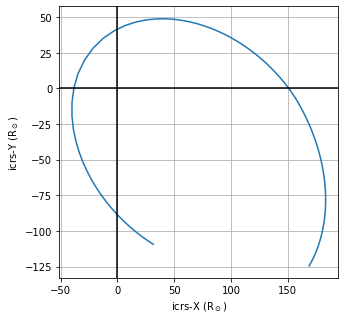

In [34]:
# Plot the coordinates (default output is inertial frame) :
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(psp_coords.x.to("R_sun"),psp_coords.y.to("R_sun"))
ax.grid()

# Set crosshair at the sun's location
ax.axhline(0,color='black',linewidth=1.5)
ax.axvline(0,color='black',linewidth=1.5)

# Label axes
ax.set_xlabel(f"{psp_coords.frame.name}-X (R$_\odot$)")
ax.set_ylabel(f"{psp_coords.frame.name}-Y (R$_\odot$)")

In [30]:
# Convert coordinates to another frame : Heliographic Carrington 
# This is the coordinate frame that co-rotates with the Sun.
# This requires the sunpy library, un-comment next line to install
# !pip install sunpy

In [33]:
from sunpy.coordinates import HeliographicCarrington
psp_coords_helio = psp_coords.transform_to(
    HeliographicCarrington(observer="self"))

In [ ]:
# Plot the heliographic coordinates:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(psp_coords.x.to("R_sun"),psp_coords.y.to("R_sun"))
ax.grid()

# Set crosshair at the sun's location
ax.axhline(0,color='black',linewidth=1.5)
ax.axvline(0,color='black',linewidth=1.5)

# Label axes
ax.set_xlabel(f"{psp_coords.frame.name}-X (R$_\odot$)")
ax.set_ylabel(f"{psp_coords.frame.name}-Y (R$_\odot$)")